In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler


In [19]:
df = pd.read_csv(r"C:\Users\jenar\Downloads\seattle-weather(in).csv")
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
5,1/6/2012,2.5,4.4,2.2,2.2,rain
6,1/7/2012,0.0,7.2,2.8,2.3,rain
7,1/8/2012,0.0,10.0,2.8,2.0,sun
8,1/9/2012,4.3,9.4,5.0,3.4,rain
9,1/10/2012,1.0,6.1,0.6,3.4,rain


In [20]:
df_int = df
df_int['weather_int'] = df_int['weather']
df_int.weather_int = df_int.weather_int.map({'drizzle':0, 'rain':1, 'sun':2, 'snow':3, 'fog':4})
df = df.drop("weather", axis=1)
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather_int
0,1/1/2012,0.0,12.8,5.0,4.7,0
1,1/2/2012,10.9,10.6,2.8,4.5,1
2,1/3/2012,0.8,11.7,7.2,2.3,1
3,1/4/2012,20.3,12.2,5.6,4.7,1
4,1/5/2012,1.3,8.9,2.8,6.1,1
5,1/6/2012,2.5,4.4,2.2,2.2,1
6,1/7/2012,0.0,7.2,2.8,2.3,1
7,1/8/2012,0.0,10.0,2.8,2.0,2
8,1/9/2012,4.3,9.4,5.0,3.4,1
9,1/10/2012,1.0,6.1,0.6,3.4,1


In [21]:
X = df[['precipitation','temp_max','temp_min','wind']]
y = df[['weather_int']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))

(1022, 4)
(439, 4)


In [22]:
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

c:\Users\jenar\miniconda3\envs\tc2004b\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jenar\miniconda3\envs\tc2004b\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jenar\miniconda3\envs\tc2004b\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\jenar\miniconda3\envs\tc2004b\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was exp

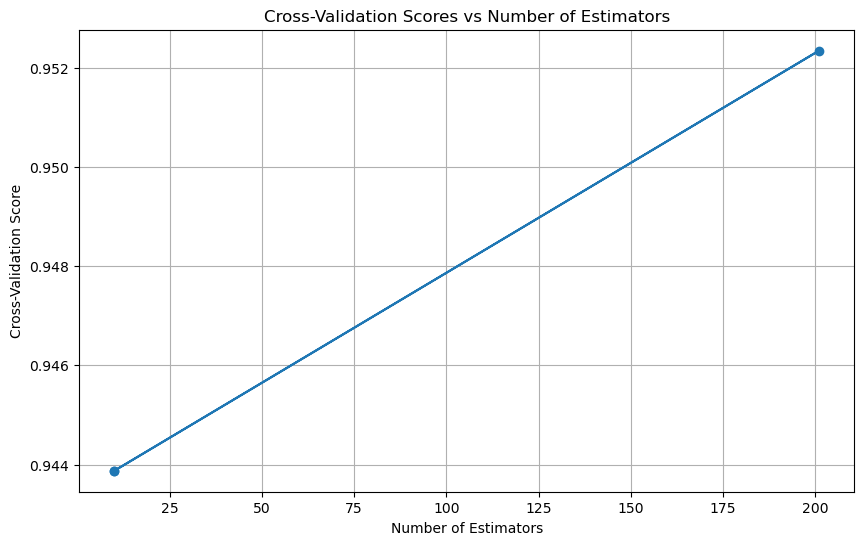

c:\Users\jenar\miniconda3\envs\tc2004b\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Predictions:  [2 1 2 0 1 1 2 2 1 0 2 2 1 0 4 1 2 2 2 2 1 2 1 2 2 1 4 2 2 4 1 2 2 3 4 1 1
 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 2 1 2 1 1 2 1 2 1 2 1 2 2 2 1 2 1 1 1 2 2 1
 1 2 1 2 1 1 1 2 1 4 1 0 2 1 2 1 1 2 2 1 1 2 2 1 2 1 2 2 1 3 1 2 2 1 4 1 1
 2 1 1 2 0 4 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 0 2 1 1 1 2 2 4 1 1 2 2 2 1
 2 2 1 2 2 2 1 3 4 2 1 1 4 2 1 2 4 1 1 4 2 2 1 1 4 2 1 1 0 2 0 1 2 0 0 1 1
 2 1 1 2 2 2 2 2 1 2 2 2 1 1 1 1 2 0 1 4 1 1 2 3 2 1 2 2 2 2 2 2 2 1 2 1 2
 2 2 2 1 2 1 2 3 2 1 2 2 1 2 2 2 2 2 1 1 2 1 2 2 2 2 3 1 1 1 1 2 2 4 1 2 1
 1 1 1 2 1 2 2 1 4 2 2 2 4 2 1 2 2 1 1 2 2 2 1 2 2 2 2 1 2 2 1 4 1 2 2 1 1
 2 1 1 1 1 1 1 1 1 1 1 4 2 2 1 1 1 2 1 2 2 1 2 4 1 1 1 2 2 1 1 2 2 4 2 1 1
 2 2 2 1 1 1 1 1 2 1 1 4 1 2 4 1 1 2 2 4 1 2 1 2 2 2 4 2 2 2 1 1 1 4 4 2 2
 1 1 1 1 1 0 1 1 1 2 1 2 4 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 1 1 2 2 2 4 1 4
 2 2 2 2 

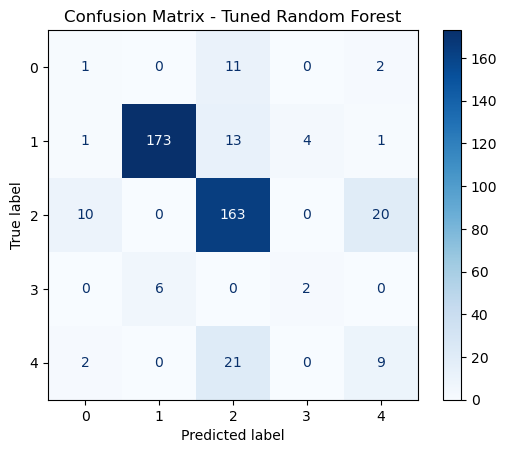

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.07      0.07      0.07        14
           1       0.97      0.90      0.93       192
           2       0.78      0.84      0.81       193
           3       0.33      0.25      0.29         8
           4       0.28      0.28      0.28        32

    accuracy                           0.79       439
   macro avg       0.49      0.47      0.48       439
weighted avg       0.80      0.79      0.79       439



In [24]:
n_estimators_range = [10, 201, 10]
cv_scores = []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5)
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores vs Number of Estimators')
plt.grid(True)
plt.show()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV for Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Get the best model and evaluate
best_rf = grid_search_rf.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
y_pred_rf = best_rf.predict(X_test)
print("Predictions: ", y_pred_rf)
print("Actual: ", y_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", report_rf)